In [ ]:
# Data Source
# https://drive.google.com/file/d/1O7vmvHfgxvjE9Wsz6oMdhhBKSotARC4c/view?usp=drive_link

In [ ]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# removing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing the data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/train_tweet.csv')
data.shape

(31962, 3)

In [ ]:
# data sample
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# null value and data type check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
# unique values in id and label column
print('count of unique in id columns:', data['id'].nunique())
print('count of unique in label columns:', data['label'].nunique())

count of unique in id columns: 31962
count of unique in label columns: 2


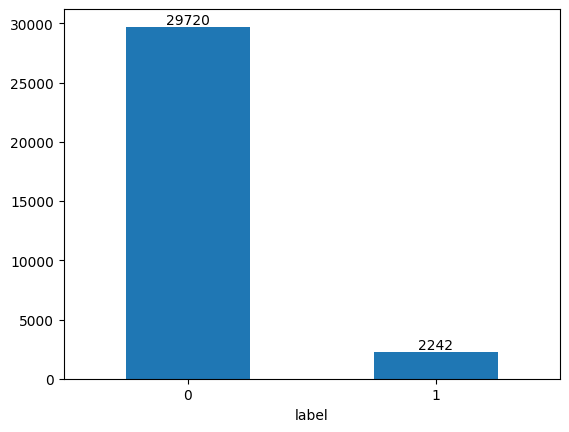

In [ ]:
# ploting the target column
fg = data['label'].value_counts().plot.bar()
fg.bar_label(fg.containers[0])
plt.xticks(rotation=0)
plt.show()

In [ ]:
# drop the id columns as it is not relevant
del data['id']

In [ ]:
# data sample for first 10 records where label is 0
data[data['label']==0].head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# data sample for first 10 records where label is 1
data[data['label']==1].head(10)

,label,tweet
13,1,@user #cnn calls #michigan middle school 'buil...
14,1,no comment! in #australia #opkillingbay #se...
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'...
56,1,@user lets fight against #love #peace
68,1,ð©the white establishment can't have blk fol...
77,1,"@user hey, white people: you can call people '..."
82,1,how the #altright uses &amp; insecurity to lu...
111,1,@user i'm not interested in a #linguistics tha...


In [ ]:
# add length column for further analysis
data['length'] = data['tweet'].str.len()
data.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [ ]:
# creating a data frame for understanding word frequency
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data['tweet'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'count'])
frequency.head(10)

,word,count
0,user,17577
1,love,2749
2,day,2311
3,amp,1776
4,happy,1686
5,just,1365
6,time,1136
7,life,1131
8,today,1079
9,like,1050


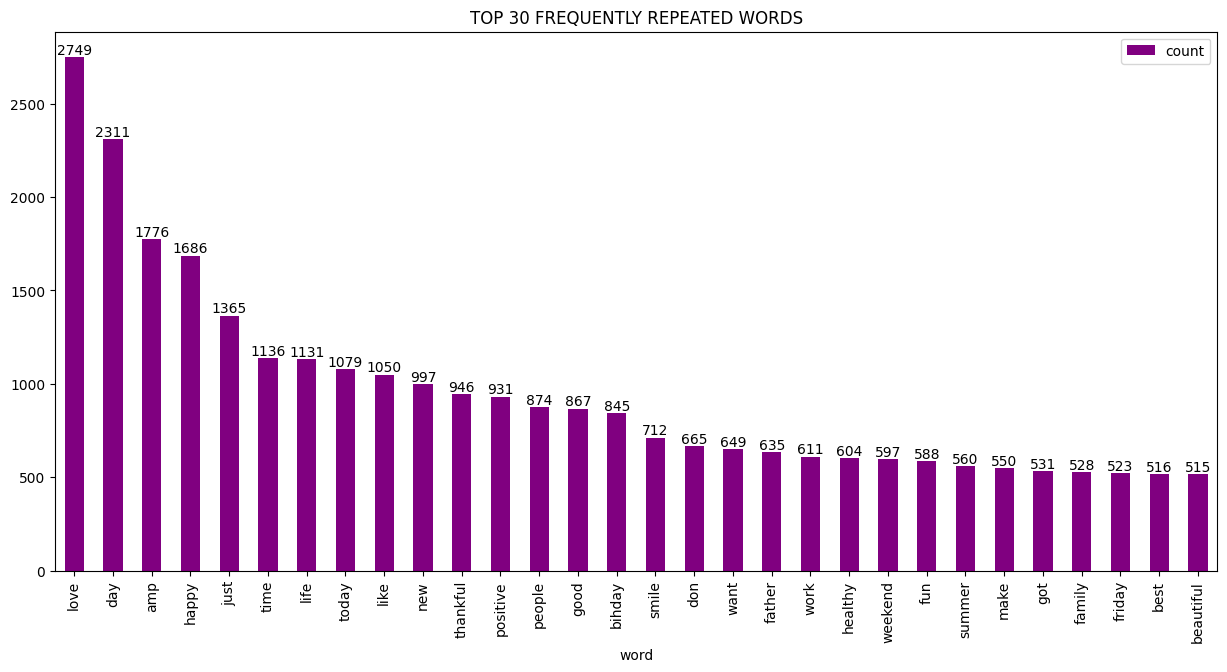

In [ ]:
# plotting the word frequency
freq_plot = frequency.loc[1:30].plot(x='word', y='count', kind='bar', figsize=(15,7), color='purple')
freq_plot.bar_label(freq_plot.containers[0])
plt.title('TOP 30 FREQUENTLY REPEATED WORDS')
plt.show()

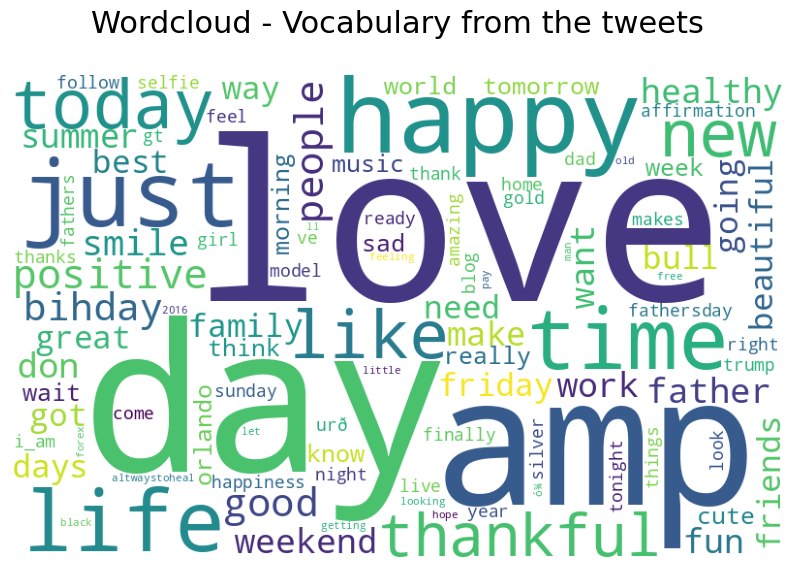

In [ ]:
# wordcloud by excluding PII data

from wordcloud import WordCloud

wc_plot = WordCloud(background_color='white', width=800, height=500).generate_from_frequencies(dict(words_freq[1:100]))

plt.figure(figsize=(10,8))
plt.imshow(wc_plot)
plt.title('Wordcloud - Vocabulary from the tweets\n', fontsize=22)
plt.axis('off')
plt.show()

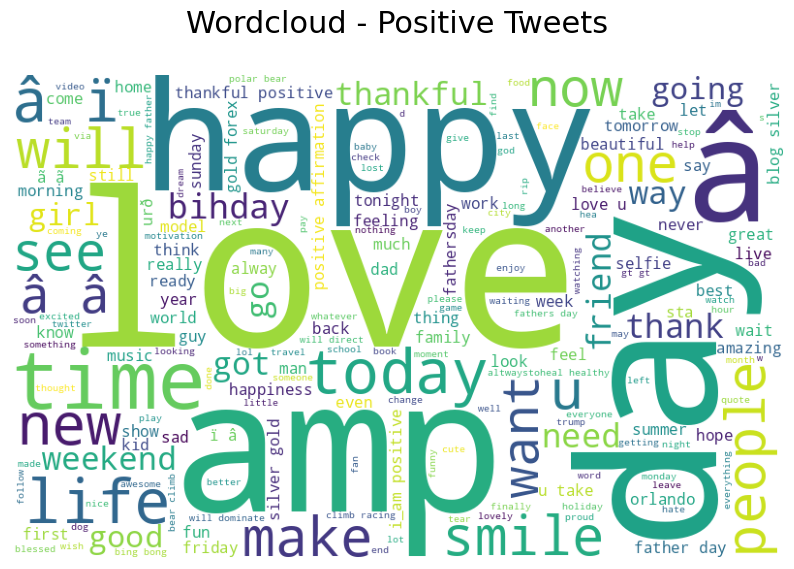

In [ ]:
# wordcloud for positive tweets
postive_tweets = ' '.join([word for word in data['tweet'][data['label']==0]])

items_to_remove = ['user', 'ð']
pattern = r'\b(' +'|'.join(re.escape(word) for word in items_to_remove) + r')\b'
res = re.sub(pattern, "", postive_tweets)
res = re.sub(r'\s+', " ", res).strip()

pwc_plot = WordCloud(background_color='white', width=800, height=500).generate(res)

plt.figure(figsize=(10,8))
plt.imshow(pwc_plot)
plt.title('Wordcloud - Positive Tweets\n', fontsize=22)
plt.axis('off')
plt.show()

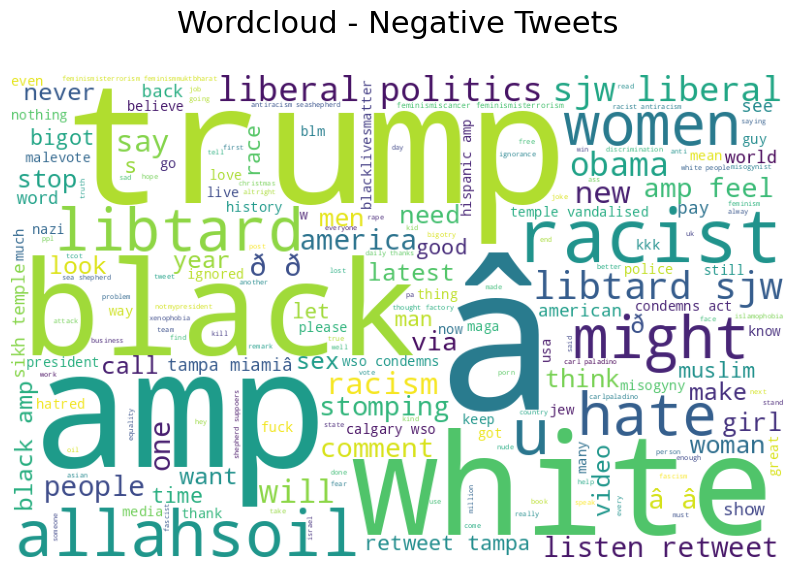

In [ ]:
# wordcloud for negative tweets
neg_tweets = ' '.join([word for word in data['tweet'][data['label']==1]])

items_to_remove = ['user']
pattern = r'\b(' +'|'.join(re.escape(word) for word in items_to_remove) + r')\b'
res = re.sub(pattern, "", neg_tweets)
res = re.sub(r'\s+', " ", res).strip()

nwc_plot = WordCloud(background_color='white', width=800, height=500).generate(res)

plt.figure(figsize=(10,8))
plt.imshow(nwc_plot)
plt.title('Wordcloud - Negative Tweets\n', fontsize=22)
plt.axis('off')
plt.show()

In [ ]:
# function to extract hashtags

def hashtag_extraction(x):
    hash = []
    import re

    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hash.append(ht)

    return hash

In [ ]:
# extracting the hashtag from positive tweets
ht_positive = hashtag_extraction(data['tweet'][data['label']==0])

# extracting the hashtag from positive tweets
ht_negative = hashtag_extraction(data['tweet'][data['label']==1])

# unnesting the list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

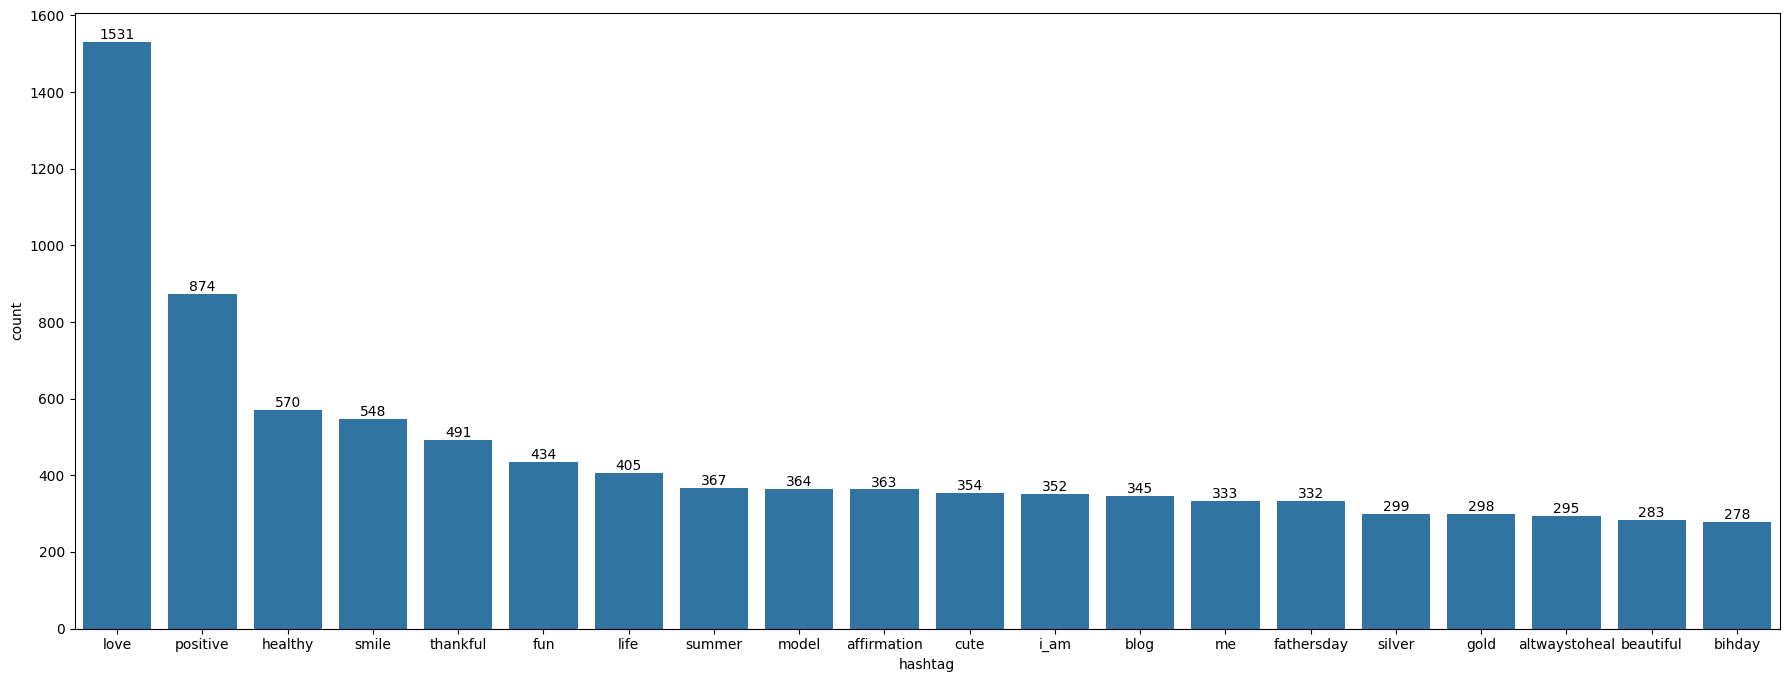

In [ ]:
# top 20 potive hashtag
import nltk
a = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'hashtag': list(a.keys()),
                  'count': list(a.values())})

# plot
d = d.nlargest(columns='count', n=20)
plt.figure(figsize=(22,8))
ax = sns.barplot(d, x='hashtag', y='count')
ax.bar_label(ax.containers[0])
plt.show()

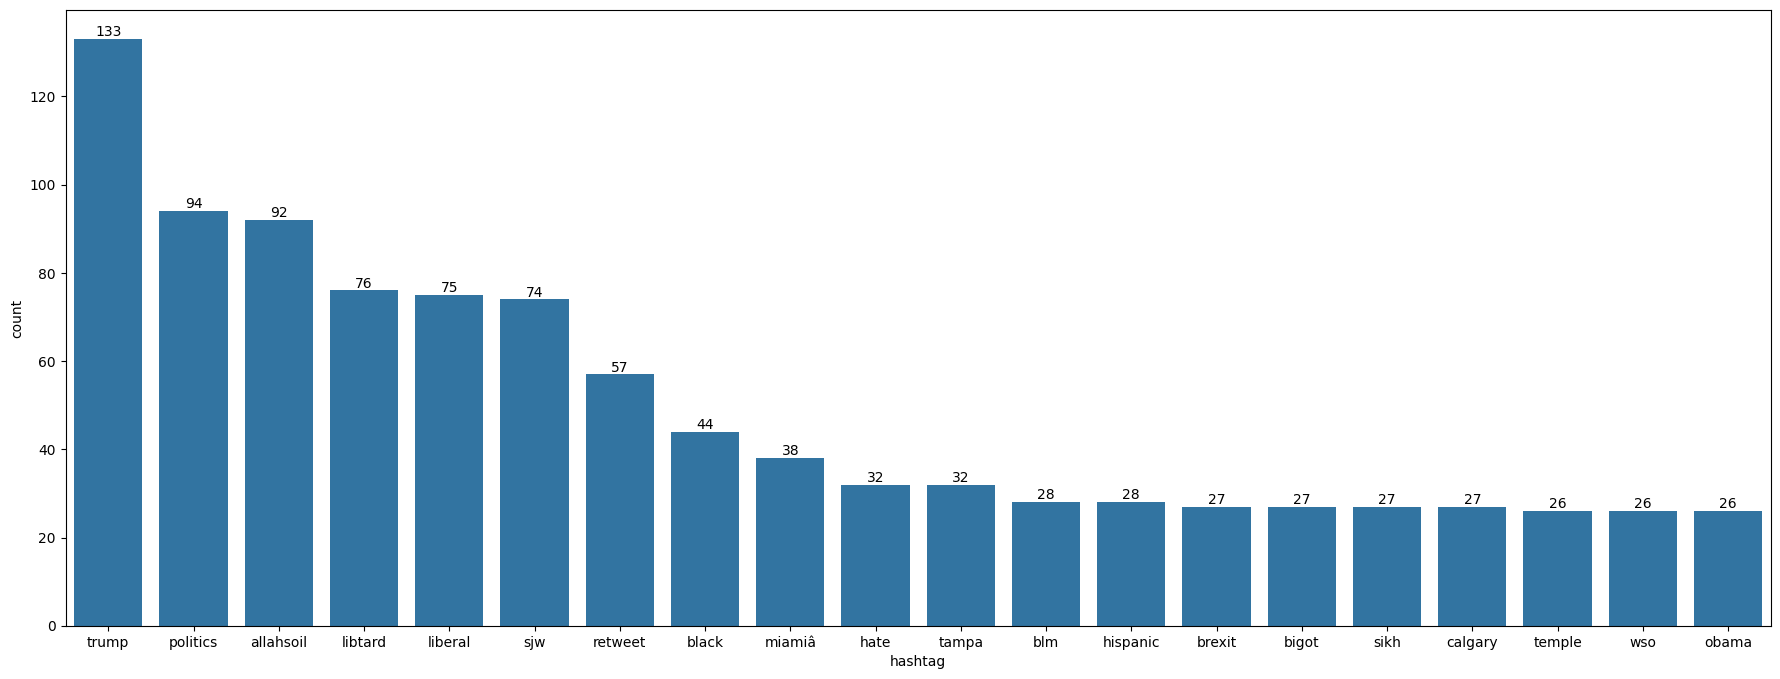

In [ ]:
# top 20 negative hashtag
a = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'hashtag': list(a.keys()),
                  'count': list(a.values())})

# plot
d = d.nlargest(columns='count', n=20)
plt.figure(figsize=(22,8))
ax = sns.barplot(d, x='hashtag', y='count')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# importing nlp libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# retainig only the text data from the column
train_corpus = []

for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', " ", data['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # stemming
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]

    # joining back the words
    review = ' '.join(review)
    train_corpus.append(review)

In [ ]:
# BOW
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(train_corpus).toarray()
y = data.iloc[:, 0]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [ ]:
# data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25569, 2500)
(6393, 2500)
(25569,)
(6393,)


In [ ]:
# data standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Test Accuracy: 0.9511966213045518
F1-Score: 0.613861386138614


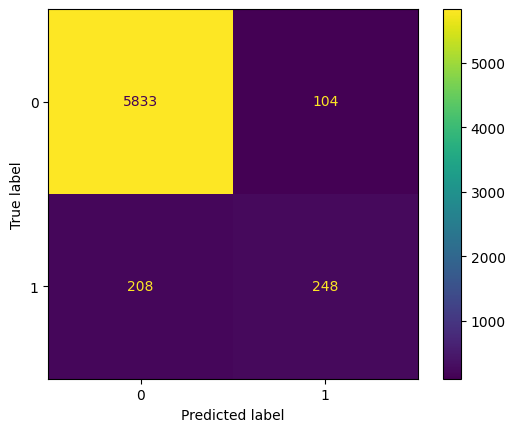

In [ ]:
# ML based NLP model
# Randomforest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

# evaluation
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Test Accuracy: 0.9303926169247615
F1-Score: 0.5435897435897435


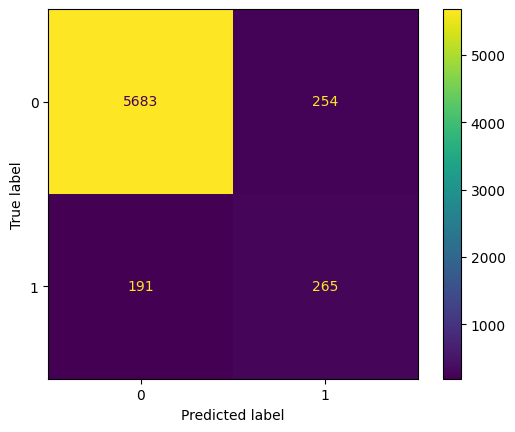

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

# evaluation
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# XGB
# naive bayes
# svm